In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-sign-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-sign-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-sign-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

40

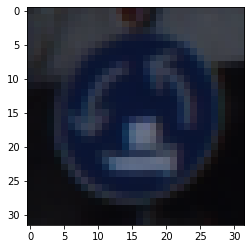

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

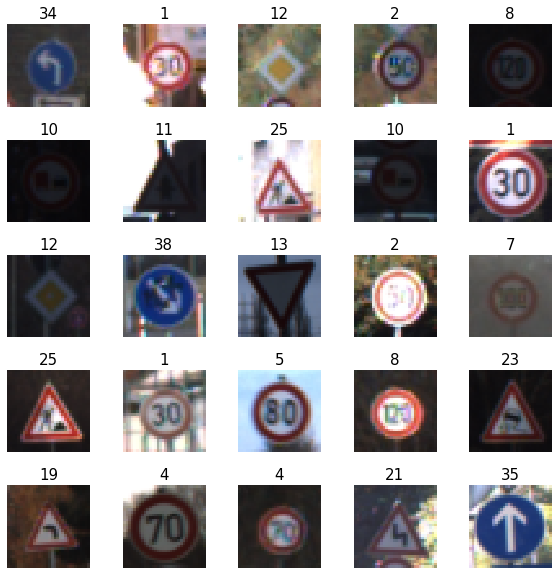

In [7]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset


for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    index = np.random.randint(0, n_training)   
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape


(34799, 32, 32, 1)

In [11]:
X_test_gray.shape


(12630, 32, 32, 1)

In [12]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray_norm

array([[[[ 0.31510417],
         [ 0.36458333],
         [ 0.14583333],
         ...,
         [-0.26302083],
         [-0.3125    ],
         [-0.23177083]],

        [[ 0.2109375 ],
         [ 0.16927083],
         [-0.04427083],
         ...,
         [-0.38020833],
         [-0.3359375 ],
         [-0.16145833]],

        [[-0.15625   ],
         [-0.15885417],
         [-0.29427083],
         ...,
         [-0.15885417],
         [-0.01822917],
         [ 0.01041667]],

        ...,

        [[-0.39322917],
         [-0.46875   ],
         [-0.30729167],
         ...,
         [-0.37760417],
         [-0.49479167],
         [-0.625     ]],

        [[-0.484375  ],
         [-0.49739583],
         [-0.29427083],
         ...,
         [-0.4921875 ],
         [-0.6484375 ],
         [-0.7265625 ]],

        [[-0.44791667],
         [-0.29947917],
         [-0.3046875 ],
         ...,
         [-0.55208333],
         [-0.6875    ],
         [-0.70052083]]],


       [[[-0.47135417],


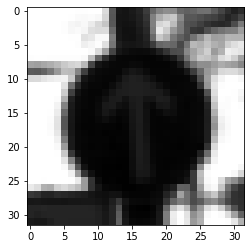

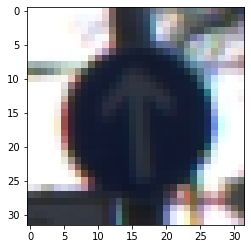

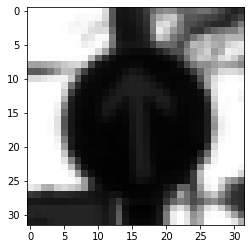

In [15]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [16]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,3)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [17]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = CNN.fit(X_train,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation, y_validation))

Epoch 1/50
70/70 [==============================] - 22s 314ms/step - loss: 4.8565 - accuracy: 0.2484 - val_loss: 2.0695 - val_accuracy: 0.4778
Epoch 2/50
70/70 [==============================] - 19s 269ms/step - loss: 1.1763 - accuracy: 0.6804 - val_loss: 1.1581 - val_accuracy: 0.7014
Epoch 3/50
70/70 [==============================] - 13s 190ms/step - loss: 0.5976 - accuracy: 0.8401 - val_loss: 1.0110 - val_accuracy: 0.7635
Epoch 4/50
70/70 [==============================] - 13s 190ms/step - loss: 0.3844 - accuracy: 0.9018 - val_loss: 0.9031 - val_accuracy: 0.7964
Epoch 5/50
70/70 [==============================] - 13s 187ms/step - loss: 0.2740 - accuracy: 0.9314 - val_loss: 0.8156 - val_accuracy: 0.8215
Epoch 6/50
70/70 [==============================] - 13s 187ms/step - loss: 0.1966 - accuracy: 0.9517 - val_loss: 0.8206 - val_accuracy: 0.8317
Epoch 7/50
70/70 [==============================] - 13s 188ms/step - loss: 0.1493 - accuracy: 0.9636 - val_loss: 0.7156 - val_accuracy: 0.8528

KeyboardInterrupt: 

In [20]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}' .format(score[1]))

395/395 [==============================] - 6s 15ms/step - loss: 1.1946 - accuracy: 0.8627
Test Accuracy: 0.8627078533172607


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

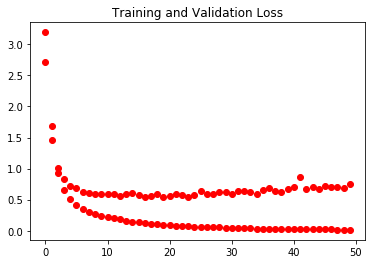

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'ro', label = 'Validation Loss')
plt.title('Training and Validation Loss')

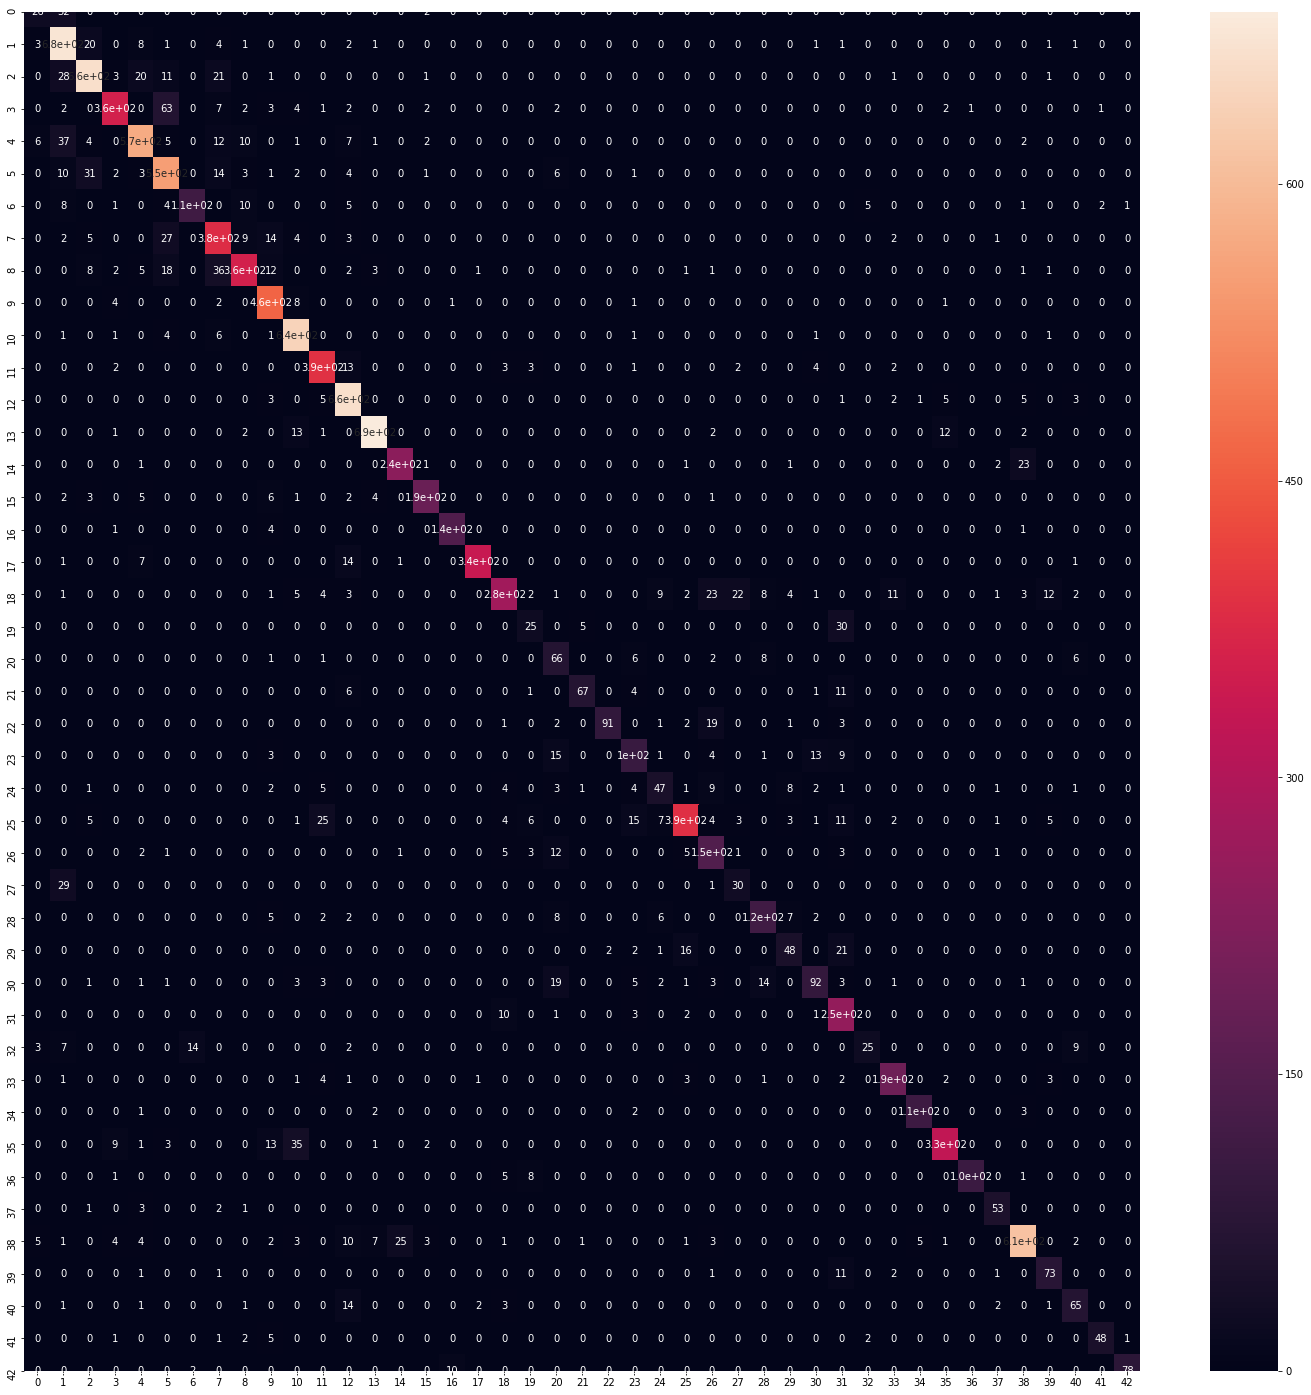

In [28]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)